# MATH 210/215 20M - Project 

* Wen Shan, Li 
* Serena Khatwa 
* Jennifer Tanojo 

Taken from the project pdf:

Ludwig et al. [1] described the population dynamics of the spruce budworm using a progression of models from simple and qualitative through to complicated and quantitative. For the first project, we will consider the simple model. To start, Ludwig et al. focused on the changing population size of the spruce budworm and ignored the slower changing features of the budworm - balsam fir interaction (changes in branch surface area and overall tree health). In Eq. (1) below, $B$ is the size of the budworm population, $r$ is the growth rate constant for budworm, $K$ is the carrying capacity of the budworm in the absence of predation, $\beta$ is the strength of predation and $\alpha$ is related to the budworm population size around which predators begin to pay attention to the budworm and switch to eating them (instead of other less plentiful treats).


## Definiton of Functions

A Python function called `f` which takes input parameters $B, r, K, \beta, \alpha, n$ and returns the value of the right-hand side of the differential equation:
$$
f(B;r,K,\beta,\alpha,n) = rB \left( 1 - \frac{B}{K} \right) - \frac{\beta B^n}{\alpha^n + B^n}
$$

In [1]:
def f(B,r,K,beta,alpha,n):
    return r*B*(1 - (B/K)) - (beta*(B**n))/(alpha**n + B**n)

Computing the derivative of $f$ with respect to $B$, we get:
$$
f'(B;r,K,\beta,\alpha,n) = r - \frac{2Br}{K} - \frac{B^{n-1} n \alpha^n \beta}{(\alpha^n + B^n)^2}
$$

A Python function called `df` which takes input parameters $B, r, K, \beta, \alpha, n$ and returns $f'(B; r, K, \beta, \alpha, n)$:

In [2]:
def df(B,r,K,beta,alpha,n):
    return r - (2*B*r)/K - (B**(n-1)*n*alpha**n*beta)/((alpha**n + B**n)**2)

## Plot of $f(B)$

Plotting $f(B)$ with $r = 1, K = 100, \beta = 10, \alpha = 5, n = 4$ in different ranges in order to observe the steady states:

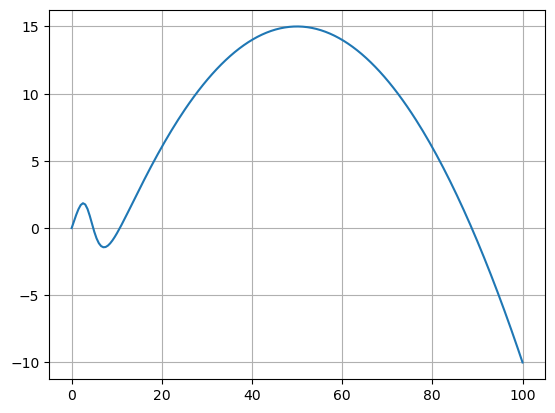

In [3]:
import numpy as np
import matplotlib.pyplot as plt

r = 1
K = 100 
beta = 10 
alpha = 5
n = 4

B = np.linspace(0,100,200)
fB = f(B,r,K,beta,alpha,n)
plt.plot(B,fB), plt.grid(True)
plt.show()

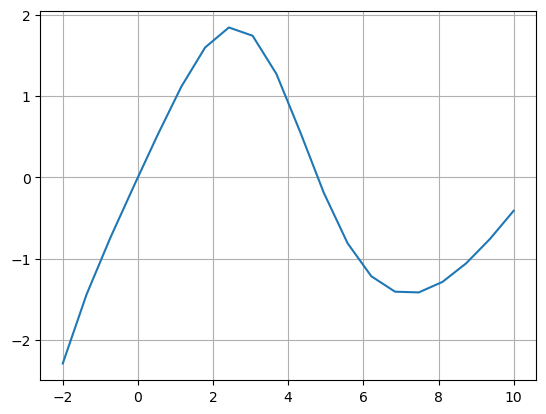

In [4]:
B = np.linspace(-2,10,20)
fB = f(B,r,K,beta,alpha,n)
plt.plot(B,fB), plt.grid(True)
plt.show()

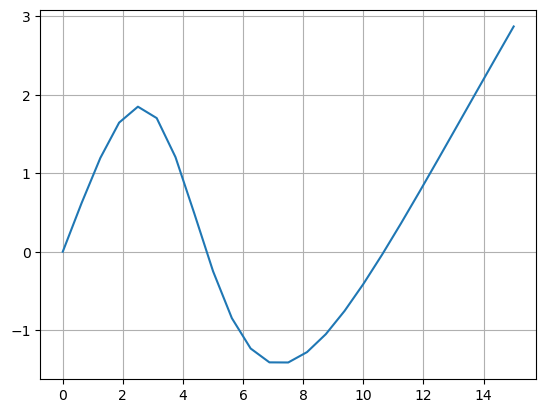

In [5]:
B = np.linspace(0,15,25)
fB = f(B,r,K,beta,alpha,n)
plt.plot(B,fB), plt.grid(True)
plt.show()

We see from the plots above that we have 4 roots, and they are (approximately) 0, 4.5, 10.5, and close to 90.

## Newton's Method
We use Newton’s method to approximate all steady-state solutions for the parameter values chosen in the previous part.
$$
B_{n + 1} = B_{n} - \dfrac{f(B;r,K,\beta,\alpha,n)}{f'(B;r,K,\beta,\alpha,n)}
$$

Approximation for the first root:

In [6]:
# root 1
r = 1
K = 100 
beta = 10 
alpha = 5
n = 4
b = [0]
index = 10
for i in range(index):
    b.append(b[i] - f(b[i],r,K,beta,alpha,n)/df(b[i],r,K,beta,alpha,n))
print("The first steady state:", b[-1])
at_df = df(b[-1],r,K,beta,alpha,n)
print("f'(", b[-1], ") = ", at_df)

The first steady state: 0.0
f'( 0.0 ) =  1.0


Approximation for the second root:

In [7]:
# root 2
r = 1
K = 100 
beta = 10 
alpha = 5
n = 4
b = [4]
index = 10
for i in range(index):
    b.append(b[i] - f(b[i],r,K,beta,alpha,n)/df(b[i],r,K,beta,alpha,n))
print("The second steady state:", b[-1])
at_df = df(b[-1],r,K,beta,alpha,n)
print("f'(", b[-1], ") = ", at_df)

The second steady state: 4.780238130446593
f'( 4.780238130446593 ) =  -1.170736130862145


Approximation for the third root:

In [8]:
# root 3
r = 1
K = 100 
beta = 10 
alpha = 5
n = 4
b = [12]
index = 10
for i in range(index):
    b.append(b[i] - f(b[i],r,K,beta,alpha,n)/df(b[i],r,K,beta,alpha,n))
print("The third steady state:", b[-1])
at_df = df(b[-1],r,K,beta,alpha,n)
print("f'(", b[-1], ") = ", at_df)

The third steady state: 10.683617545652403
f'( 10.683617545652403 ) =  0.6227788874462682


Approximation for the fourth root:

In [9]:
# root 4
r = 1
K = 100 
beta = 10 
alpha = 5
n = 4
b = [3]
index = 10
for i in range(index):
    b.append(b[i] - f(b[i],r,K,beta,alpha,n)/df(b[i],r,K,beta,alpha,n))
print("The fourth steady state:", b[-1])
at_df = df(b[-1],r,K,beta,alpha,n)
print("f'(", b[-1], ") = ", at_df)

The fourth steady state: 88.72996363422153
f'( 88.72996363422153 ) =  -0.7746038181642392


## Classifying the Steady States

* The first steady state at $x_1 = 0$ is unstable since $f'(x_1) > 0$.
* The second steady state at $x_2 = 4.780238130446593...$ is stable since $f'(x_2) < 0.$
* The third steady state at $x_3 = 10.683617545652403...$ is unstable since $f'(x_3) > 0$.
* The fourth steady state at $x_4 = 88.72996363422153...$ is stable since $f'(x_4) < 0$.

## Steady State Observations

We can observe the change of the steady states as we change the values and plot them:

#### Plot 1: Increased $r$ value

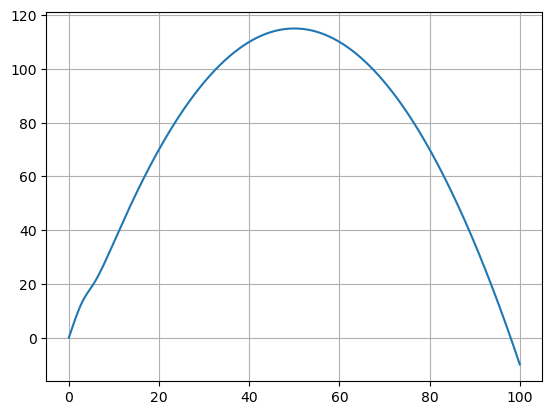

In [10]:
# r = 1 -> r = 5
r = 5
K = 100 
beta = 10 
alpha = 5
n = 4

B = np.linspace(0,100,200)
fB = f(B,r,K,beta,alpha,n)
plt.plot(B,fB), plt.grid(True)
plt.show()

We can see that we now have two steady state solutions instead of four when we increase the $r$ value.

#### Plot 2: Increased $K$ value

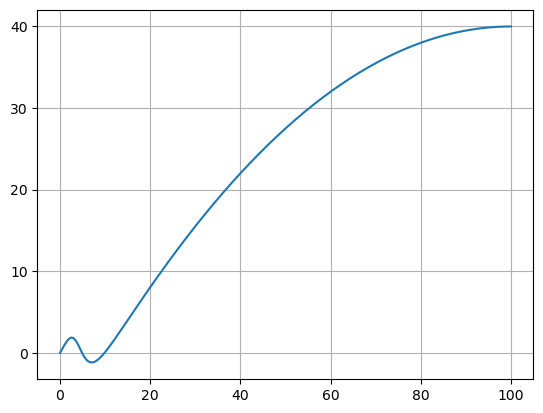

In [11]:
# K = 100 -> K = 200
r = 1
K = 200
beta = 10 
alpha = 5
n = 4

B = np.linspace(0,100,200)
fB = f(B,r,K,beta,alpha,n)
plt.plot(B,fB), plt.grid(True)
plt.show()

We can see that we now have three steady state solutions instead of four when we increase the $K$ value.

#### Plot 3: Increased $\beta$ value

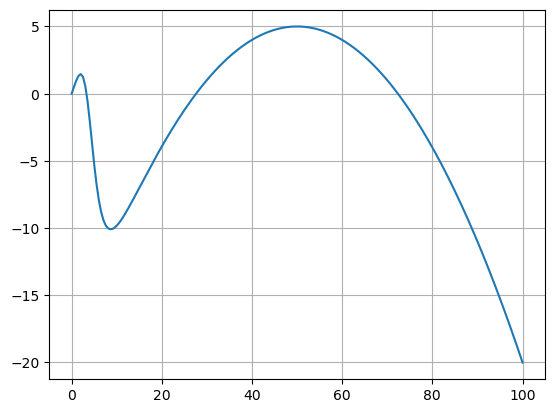

In [12]:
# beta = 10 -> beta = 20
r = 1
K = 100 
beta = 20
alpha = 5
n = 4

B = np.linspace(0,100,200)
fB = f(B,r,K,beta,alpha,n)
plt.plot(B,fB), plt.grid(True)
plt.show()

We can see that we still have four steady state solutions when we increase the $\beta$ value.

#### Plot 4: Increased $\alpha$ value

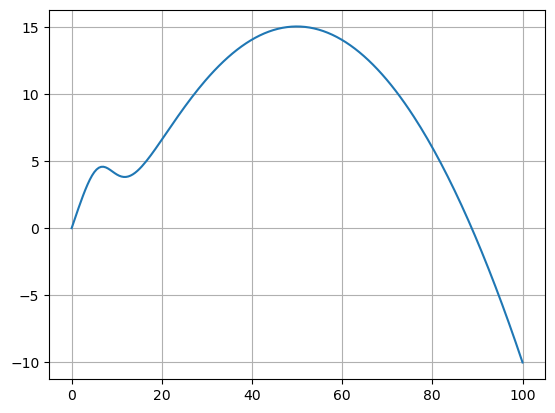

In [13]:
# alpha = 5 -> alpha = 10
r = 1
K = 100 
beta = 10 
alpha = 10
n = 4

B = np.linspace(0,100,200)
fB = f(B,r,K,beta,alpha,n)
plt.plot(B,fB), plt.grid(True)
plt.show()

We can see that we have two steady state solutions instead of four when we increase the $\alpha$ value.

#### Plot 4: Increased $n$ value

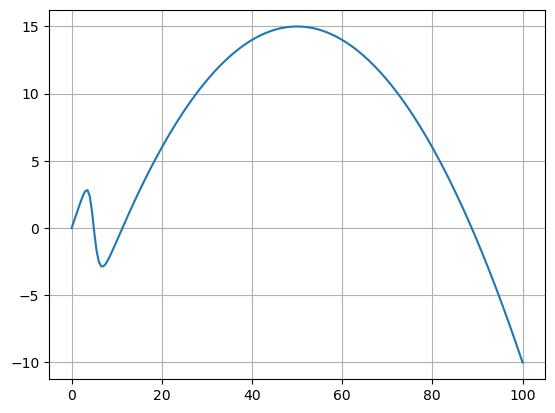

In [14]:
# Plot 6
r = 1
K = 100 
beta = 10 
alpha = 5
n = 8

B = np.linspace(0,100,200)
fB = f(B,r,K,beta,alpha,n)
plt.plot(B,fB), plt.grid(True)
plt.show()

We can see that we still have four steady state solutions when we increase the $n$ value.